# Breakout Room Study Case
Panggil kembali data **loan_prediction.csv**. Sebelumnya anda telah melakukan analisis pendapatan nasabah. Anda berfikir bahwa anda memerlukan informasi tambahan. Anda telah menyiapkan beberapa pertanyaan mengenai riset anda nantinya. List pertanyaan tersebut seperti berikut :
1. Berapa rata-rata dan standar deviasi dari coapplicantincome?
2. Anda berasumsi bahwa kemungkinan besar coapplicantincome pasti tidak kurang dari 1000. Apakah asumsi anda benar?
3. Berapakah rata-rata coapplicantincome berdasarkan loan_status ?
4. Kira-kira pada kisaran berapakah coapplicantincome untuk Graduated?
5. Kamu ingin mengetahui apakah Education akan mempengaruhi coapplicantincome?


## Load Data

In [3]:
import os
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
df=pd.read_csv('/content/gdrive/MyDrive/MBKM Data Scientist/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Pertanyaan 1
Mencari rata-rata dan standar deviasi dari coapplicantincome.

In [11]:
mean_income= df["CoapplicantIncome"].mean()
print('Rata-rata pendapatan adalah '+ str(mean_income))
std_income= df["CoapplicantIncome"].std()
print('Standar deviasi pendapatan adalah '+ str(std_income))

Rata-rata pendapatan adalah 1621.2457980271008
Standar deviasi pendapatan adalah 2926.2483692241885


## Pertanyaan 2
Uji hipotesis dengan asumsi bahwa coapplicantincome pasti tidak kurang dari 1000

**Hypothesis:** <br>
 Null Hypothesis: μ <= 1000 <br>
 Alternative Hypothesis: μ > 1000

In [12]:
tset, pval = ttest_1samp(df['CoapplicantIncome'], 1000)

print("p-values :", pval)
if pval < 0.05:    # nilai dari alpha adalah 0.05 atau 5%
   print("Tolak H0")
else:
  print("Gagal Tolak H0")

p-values : 1.9871354383283204e-07
Tolak H0


## Pertanyaan 3
Mencari rata-rata coapplicantincome berdasarkan loan_status

In [13]:
df.groupby('Loan_Status')['CoapplicantIncome'].mean()

Loan_Status
N    1877.807292
Y    1504.516398
Name: CoapplicantIncome, dtype: float64

In [14]:
sum(df['Loan_Status'] == "Y")

422

In [15]:
sum(df['Loan_Status'] == "N")

192

## Pertanyaan 4
Mencari kisaran coapplicantincome untuk Graduated

In [16]:
df.groupby('Education')['CoapplicantIncome'].mean()

Education
Graduate        1717.474833
Not Graduate    1276.544776
Name: CoapplicantIncome, dtype: float64

In [17]:
df.groupby('Education')['CoapplicantIncome'].std()

Education
Graduate        3230.965850
Not Graduate    1310.343602
Name: CoapplicantIncome, dtype: float64

## Pertanyaan 5
Uji Hipotesis untuk pengaruh Education terhadap coapplicantincome

In [20]:
listedu=list(df['Education'].unique())
listedu

['Graduate', 'Not Graduate']

<AxesSubplot:xlabel='Education', ylabel='CoapplicantIncome'>

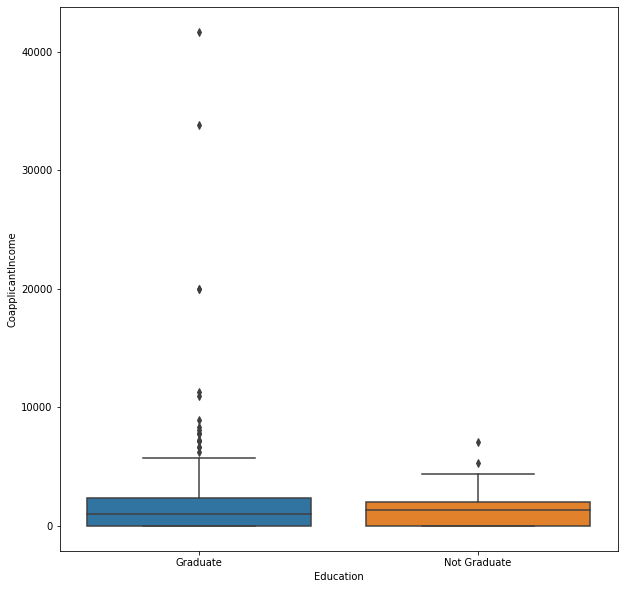

In [23]:
plt.figure(figsize=(10,10))
sns.boxplot(x = "Education", y = "CoapplicantIncome", data = df)

**Hipotesis CoapplicantIncome**<br>
Hipotesis Null : $\mu_1-\mu_2=0$, CoapplicantIncome dengan Education Graduate sama dengan Not Graduate<br>
Hipotesis Alternative : $\mu_1 - \mu_2 != 0$, CoapplicantIncome dengan Education Graduate tidak sama dengan Not Graduate<br>

In [28]:
list_data= range(2)
alpha=0.05

for i in list_data:
    for j in list_data[i+1:]:
            group1 = df[df['Education']==listedu[i]]["CoapplicantIncome"]
            group2 = df[df['Education']==listedu[j]]["CoapplicantIncome"]
            stat, p = ttest_ind(group1, group2)
            print('=======================================================================')
            print('Hipotesis dari ' + str(listedu[i] + ' dan ' + str(listedu[j])))
            print('t=%.3f, p=%.3f' % (stat, p))

            # interpret via p-value
            if p < alpha:
	            print('Tolak H0, maka harga CoapplicantIncome {} tidak sama dengan {}.'.format(listedu[i], listedu[j]))
            else:
	            print('Terima H0, maka CoapplicantIncome {} sama dengan {}.'.format(listedu[i], listedu[j]))

Hipotesis dari Graduate dan Not Graduate
t=1.544, p=0.123
Terima H0, maka CoapplicantIncome Graduate sama dengan Not Graduate.
